In [1]:
import sys
sys.path.append('../..')
from utils import (
    show_sbs,
    load_config,
    _print,
)

import os
import ipywidgets as widgets

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchmetrics
from torch.optim import Adam, SGD
from losses import DiceLoss, DiceLossWithLogtis
from torch.nn import BCELoss, CrossEntropyLoss
import ali_utils

# Create a dropdown widget
dropdown = widgets.Dropdown(options=(["segpc","isic2018"]), description='Select a file:')
dropdown


Dropdown(description='Select a file:', options=('segpc', 'isic2018'), value='segpc')

In [2]:
config=load_config(f'ali_configs/{dropdown.value}/dataset.yaml')

from tqdm import tqdm
import numpy as np
from torch.utils.data import DataLoader, Subset
from torchvision import transforms
img_transform = transforms.Compose([transforms.ToTensor()])
# img_transform =None
# transform for mask
# msk_transform = transforms.Compose([transforms.ToTensor()])
# msk_transform=None
msk_transform = torch.tensor


te_dataset = ali_utils.class_by_name(config['dataset']['class'])(mode="te", one_hot=True,**config['dataset'],img_transform=img_transform,msk_transform=msk_transform)
te_dataloader = DataLoader(te_dataset, **config['data_loader']['test'])
from PIL import Image
import cv2
def skin_plot(img, gt, pred):
    img = np.array(img)
    gt = np.array(gt)
    pred = np.array(pred)
    edged_test = cv2.Canny(pred, 100, 255)
    contours_test, _ = cv2.findContours(edged_test, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    edged_gt = cv2.Canny(gt, 100, 255)
    contours_gt, _ = cv2.findContours(edged_gt, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for cnt_test in contours_test:
        cv2.drawContours(img, [cnt_test], -1, (255, 0, 0), 1)
    for cnt_gt in contours_gt:
        cv2.drawContours(img, [cnt_gt], -1, (0,255,0), 1)
    return img

#---------------------------------------------------------------------------------------------
import random

save_imgs_dir = f"{config['model']['save_dir']}/visualized"

if not os.path.isdir(save_imgs_dir):
    os.mkdir(save_imgs_dir)

with torch.no_grad():
    
    for batch in tqdm(te_dataloader):
        imgs = batch['image']
        msks = batch['mask']
        
        
        ids = batch['id']
        
        
        txm = imgs.cpu().numpy()
        tbm = torch.argmax(msks, 1).cpu().numpy()
        tbm = msks.cpu().numpy()[:,-1,...]
        
        # tpm = torch.argmax(preds, 1).cpu().numpy()
        print(tbm.shape)
        print(tbm[1].max())
        continue_to_the_next_cell
        tid = ids
        debug_imgs=[]
        for idx in range(len(tbm)):
            img = np.moveaxis(txm[idx, :3], 0, -1)*255.
            img = np.ascontiguousarray(img, dtype=np.uint8)
            gt = np.uint8(tbm[idx]*255.)
            pred = np.where(tpm[idx]>0.6, 255, 0)
            pred = np.ascontiguousarray(pred, dtype=np.uint8)
            
            res_img = skin_plot(img, gt, pred)

            pred = np.where(tpm[idx]>0.3, 255, 0)
            pred = np.ascontiguousarray(pred, dtype=np.uint8)
            
            res_img = skin_plot(res_img, gt, pred)
            
            fid = tid[idx]
            # Image.fromarray(img).save(f"{save_imgs_dir}/{fid}_img.png")
            # Image.fromarray(res_img).save(f"{save_imgs_dir}/{fid}_img_gt_pred.png")
            # if(random.random()<0.05):
            debug_imgs.append(Image.fromarray(res_img))
            
            if idx>4:break
        import ipyplot
        ipyplot.plot_images(debug_imgs, max_images=4, img_width=150)

loading X_te...
loading Y_te...
finished.cyts_te_224x224_s2.5_Y.npy


  0%|          | 0/50 [00:00<?, ?it/s]

torch.Size([3, 224, 224]) sssstorch.Size([3, 224, 224])torch.Size([3, 224, 224])
  ssssssss

torch.Size([3, 224, 224]) sssstorch.Size([3, 224, 224])
torch.Size([3, 224, 224])  ssssssss

torch.Size([3, 224, 224])torch.Size([3, 224, 224])  ssssssss
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])  ssssssss

torch.Size([3, 224, 224]) ssss
torch.Size([3, 224, 224]) torch.Size([3, 224, 224])torch.Size([3, 224, 224])ssss  ssss
ssss
torch.Size([3, 224, 224])
 ssss
torch.Size([3, 224, 224])torch.Size([3, 224, 224])torch.Size([3, 224, 224])   ssssssssssss
torch.Size([3, 224, 224])

 ssss
torch.Size([3, 224, 224])torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) ssss ssss

torch.Size([3, 224, 224])ssss ssss

torch.Size([3, 224, 224]) torch.Size([3, 224, 224])ssss 
torch.Size([3, 224, 224])sssstorch.Size([3, 224, 224]) 
 ssssssss

torch.Size([3, 224, 224]) sssstorch.Size([3, 224, 224])
 torch.Size([3, 224, 224])torch.Size([3, 224, 224])ssss  
ssssssss
torch.Size([3, 224, 224])
 ssss
torch.Si

  0%|          | 0/50 [00:00<?, ?it/s]

(16, 224, 224)
1.0


NameError: name 'continue_to_the_next_cell' is not defined

torch.Size([16, 3, 224, 224])


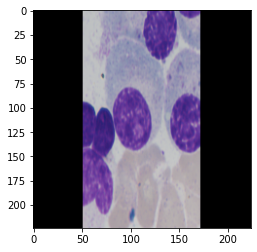

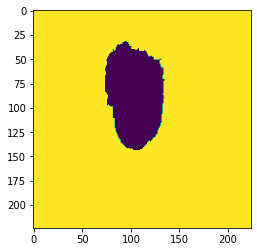

tensor(1.)


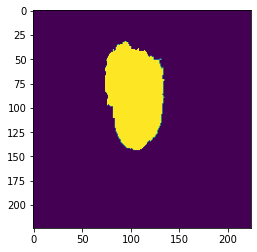

tensor(1.)


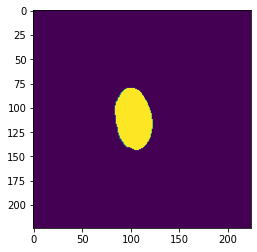

tensor(1.)


In [3]:
from matplotlib import pyplot as plt
print(msks.shape)
image_number=2

plt.imshow(np.transpose(imgs[image_number],(1, 2, 0))[:,:,:-1])
# plt.imshow(imgs[image_number][:,:,:-1])
plt.show()
for i in range(0,te_dataset.number_classes):
    # plt.imshow(imgs[-1,0:3])
    plt.imshow(msks[image_number,i])
    plt.show()
    print(msks[image_number,i].max())

In [ ]:
msk=np.load('a.npy')
msk.max()

In [ ]:
b=np.load('b.npy')
c=np.load('c.npy')
c.max()

In [ ]:
plt.imshow(c>0)

In [ ]:
y=np.load('/raid/home/labusermodaresi/datasets/TCIA_SegPC_dataset/np/cyts_te_224x224_s2.5_Y.npy')
for i in range(0,len(y)):
    plt.imshow(y[i])
    plt.show()
# np.load('/raid/home/labusermodaresi/datasets/TCIA_SegPC_dataset/np/cyts_te_224x224_s2.5_Y.npy